# Notes

This notebook plots the Macquart relation (adapted from christmas_lightray_binned_lss_plots.ipynb)

It also plots the average DM from halos and from the IGM separately from Prochaska's FRB library found here: (https://github.com/FRBs/FRB)

# Imports

In [1]:
import yt
import trident
import numpy as np
import illustris_python as il
from astropy import units as u
from astropy import constants as c
from yt.utilities.cosmology import Cosmology
from matplotlib import pyplot as plt
import healpy as hp
import h5py
import time
from numba import jit
import healpy as hp
import os
from frb.dm import igm
from astropy.coordinates import Distance
from astropy import cosmology
from astropy.cosmology import Planck15

# Choose redshift range

In [16]:
z=np.linspace(0.01,0.7,10) #redshift range

# Calculate DMs for these

In [17]:
print (z)


[0.01       0.08666667 0.16333333 0.24       0.31666667 0.39333333
 0.47       0.54666667 0.62333333 0.7       ]
574.855427313521 pc / cm3


In [19]:
print('Calculating DMs')
DMcosm=[igm.average_DM(i) for i in z] #average dm cosmic for this redshift
print('DM from cosmic: {0}'.format(DMcosm))
DMIGM=[igm.average_DMIGM(i) for i in z] #average dm igm for this redshift
print('DM from IGM: {0}'.format(DMIGM))
DMhalos=[igm.average_DMhalos(i) for i in z] #average dm of halos for this redshift
print('DM from halos: {0}'.format(DMhalos))




Calculating DMs
DM from cosmic: [<Quantity 8.20073173 pc / cm3>, <Quantity 72.44896877 pc / cm3>, <Quantity 138.80259174 pc / cm3>, <Quantity 206.84112565 pc / cm3>, <Quantity 276.20082744 pc / cm3>, <Quantity 346.57646471 pc / cm3>, <Quantity 417.71468446 pc / cm3>, <Quantity 489.40753697 pc / cm3>, <Quantity 561.48779112 pc / cm3>, <Quantity 633.82217829 pc / cm3>]
DM from IGM: [<Quantity 4.39839178 pc / cm3>, <Quantity 39.41815147 pc / cm3>, <Quantity 76.5641376 pc / cm3>, <Quantity 115.61505671 pc / cm3>, <Quantity 156.37598434 pc / cm3>, <Quantity 198.68089038 pc / cm3>, <Quantity 242.3878034 pc / cm3>, <Quantity 287.37488651 pc / cm3>, <Quantity 333.53877197 pc / cm3>, <Quantity 380.79117573 pc / cm3>]
DM from halos: [<Quantity 3.80233995 pc / cm3>, <Quantity 33.03081729 pc / cm3>, <Quantity 62.23845415 pc / cm3>, <Quantity 91.22606894 pc / cm3>, <Quantity 119.8248431 pc / cm3>, <Quantity 147.89557432 pc / cm3>, <Quantity 175.32688106 pc / cm3>, <Quantity 202.03265046 pc / cm3>, 

# Convert to values

In [20]:
DMcosm_val=[i.value for i in DMcosm]
DMIGM_val=[i.value for i in DMIGM]
DMhalos_val=[i.value for i in DMhalos]

# Plot

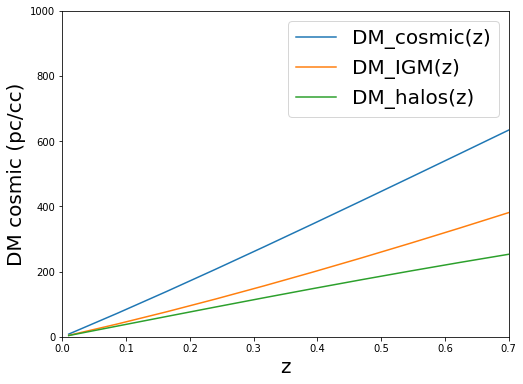

In [21]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.set_xlabel('z',fontsize=20)
ax.set_ylabel('DM cosmic (pc/cc)', fontsize=20)
ax.set_ylim([0,1000])
ax.set_xlim([0,0.7])

ax.plot(z,DMcosm_val,label='DM_cosmic(z)')
ax.plot(z,DMIGM_val,label='DM_IGM(z)')
ax.plot(z,DMhalos_val,label='DM_halos(z)')

plt.legend(fontsize=20)


plt.savefig('Macquart_relation.png')
plt.show()
